 # Exploratory Data Analysis of listings Data Frame

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
# import clean dataset
listings_subset = pd.read_pickle("../data/clean/listings_subset.pkl")
listings_subset = pd.DataFrame(listings_subset)
listings_subset.head()

,accommodates,availability_30,cnn_pretrained_predictions,host_gender,host_identity_verified,host_is_superhost,neighbourhood,minimum_nights_avg_ntm,number_amenities,number_bathrooms,...,price,property_type,review_scores_rating,reviews_per_month,room_type,shared_bathrooms,frac_negative,frac_norwegian,median_review_length,number_languages
id,,,,,,,,,,,,,,,,,,,,,
42932,3,17,903.948022,female,t,f,Frogner,3.0,34,1.0,...,1999,Entire rental unit,4.84,0.73,Entire home/apt,False,0.210526,0.026316,265.5,3.0
69964,3,16,850.367395,male,t,f,Sagene,28.0,9,1.0,...,889,Entire rental unit,4.78,1.28,Entire home/apt,False,0.222222,0.222222,714.0,2.0
71725,3,0,788.402173,female,t,f,Gamle Oslo,4.0,14,1.0,...,507,Private room in rental unit,4.73,0.5,Private room,False,0.142857,0.000000,261.0,4.0
85902,4,0,906.453882,female,t,t,Gamle Oslo,5.0,29,1.0,...,821,Entire rental unit,4.73,1.24,Entire home/apt,False,0.111111,0.063492,240.0,6.0
92103,4,0,875.319348,female,f,f,Grünerløkka,3.0,6,1.0,...,1281,Entire rental unit,4.85,0.16,Entire home/apt,False,0.000000,0.000000,311.5,1.0


  ## Most expensive neighbourhoods

In [4]:
price_by_nbhood = (
    listings_subset.groupby("neighbourhood")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)
price_by_nbhood

,min,mean,max
neighbourhood,,,
Marka,454,1778.555556,5000
Vestre Aker,400,1459.144737,12000
Nordstrand,359,1426.134831,10000
Frogner,240,1415.234828,22000
Ullern,282,1345.742424,10000
St. Hanshaugen,270,1308.073077,15071
Stovner,570,1278.5,2500
Sentrum,511,1236.52,4199
Gamle Oslo,294,1185.122195,15000


Text(0.5, 0.98, 'Log-Price Distribution')

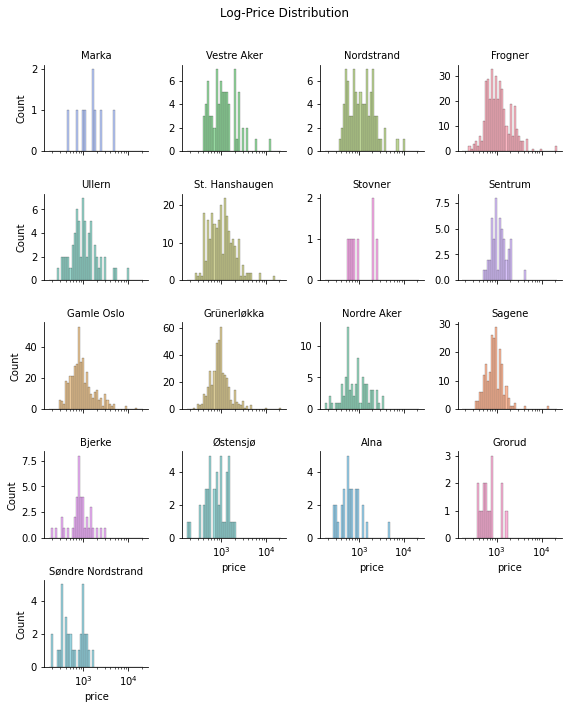

In [5]:
g = sns.displot(
    data=listings_subset.loc[listings_subset["price"] > 0],
    kind="hist",
    x="price",
    hue="neighbourhood",
    col="neighbourhood",
    col_wrap=4,
    log_scale=True,
    facet_kws=dict(sharey=False),
    legend=False,
    height=2,
    aspect=1,
    col_order=price_by_nbhood.index,
).set_titles(col_template="{col_name}")

fig = g.figure
fig.subplots_adjust(top=0.9)
fig.suptitle("Log-Price Distribution")

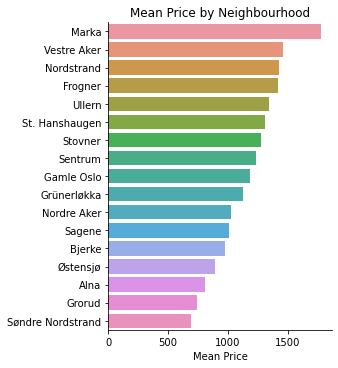

In [6]:
(
    sns.catplot(
        data=price_by_nbhood.reset_index(), kind="bar", x="mean", y="neighbourhood"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Neighbourhood")
)

  ## Most expensive room types

In [7]:
# exclude prices of 0
price_by_roomtype = (
    listings_subset.groupby("room_type")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)

price_by_roomtype

,min,mean,max
room_type,,,
Entire home/apt,250,1346.253265,22000
Shared room,300,696.235294,2000
Private room,170,673.238202,7397


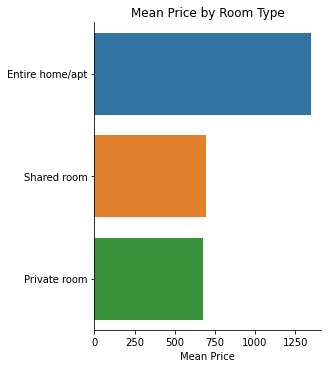

In [8]:
(
    sns.catplot(
        data=price_by_roomtype.reset_index(), kind="bar", x="mean", y="room_type"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Room Type")
)

  ## Are rooms with more reviews more or less expensive?

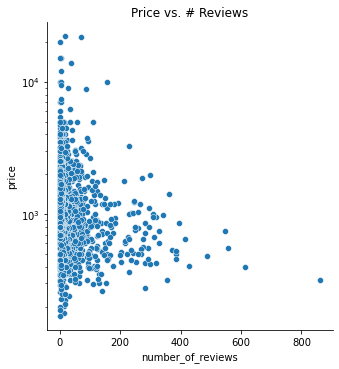

In [9]:
sns.relplot(
    kind="scatter",
    data=listings_subset,
    x="number_of_reviews",
    y="price",
).set(yscale="log", title="Price vs. # Reviews")